<font size=9>Project Definition</font>   

__Find a dataset from Kaggle, government, Google,__

Use Regression and Classification models to do predictions.  
Select appropriate features and target.  
Follow the steps of machine learning.  

Compare accuracy of the following regression models:  
- Multiple Linear/Polynomial Regression  
- Support Vector Regression  
- Decision Tree  
- Random Forest  

Compare accuracy of the following classification models:  
- K Nearest Neighbor  
- Logistic Regression  
- Kernel SVM  
- Decision Tree/Random Forest  
- Naïve Bayes  


# About Dataset
### This is a dataset I aquired from Kaggle about housing prices in california. Quoating the data set sharer's:
## "__The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data__"


In [2]:
import pandas as pd
data = pd.read_csv('housing.csv')
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# The following image is to get an idea of the range of longitude and latitude for California 

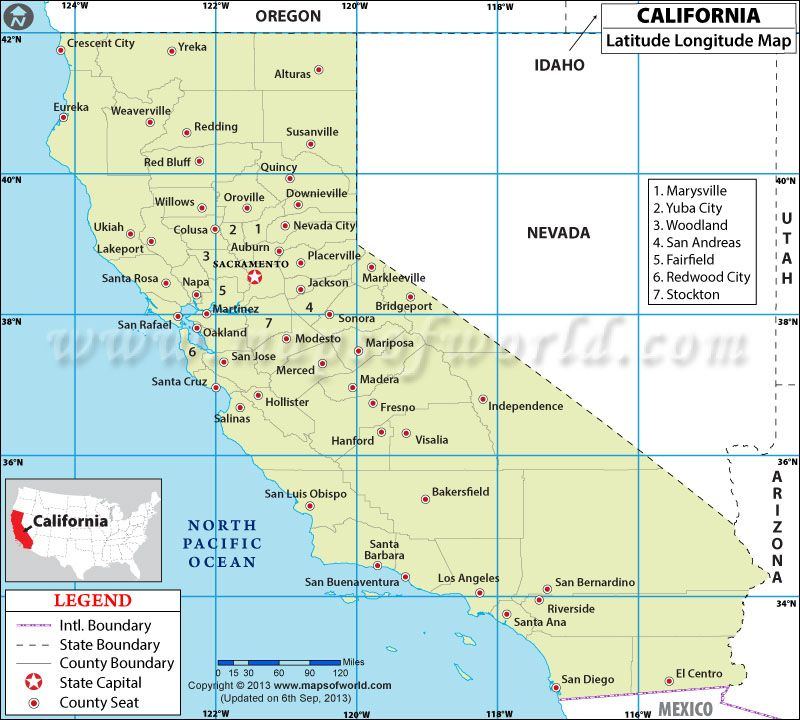

In [115]:
from IPython.display import Image

# Display an image
Image(filename='california_longitude_2.jpg')


## The dataset is reliable for both regression and classification problems. The data is very clean and only requires small amount of treatment

For regression: median_house_value is the target 

For classification: ocean_proximity_NEAR BAY is the target 

# For both types of models we need to preproces the data in the same way by __dropping missing values__, __Standardization__, and __One-Hot-Encoding__

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Handle missing values
data = data.dropna()

# Encode categorical variables
encoder = OneHotEncoder()

# Make an array out of the encoded ocean_proximity feature
encoded_features = encoder.fit_transform(data[['ocean_proximity']]).toarray()

# Creating temporary dataframe to add back to data
# This dataframe works with the array and the encoder to put labels on the array's features 
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Concatenate the encoded_df with data along the rows. Drop ocean_proximity as it is getting replaced
data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
data = data.drop(columns=['ocean_proximity'])

# this will print the result of each step, resulting in a finished data
print("Encoder categories:\n", encoder.categories_)
print("\nEncoded DataFrame:\n", encoded_df.head())
print("\nUpdated DataFrame:\n", data.head())

Encoder categories:
 [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]

Encoded DataFrame:
    ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0  

Updated DataFrame:
    longitude  latit

<font size=8>For regression models the Feature selection will revolve around median_house_values</font>   

In [7]:
from sklearn.model_selection import train_test_split
# Select features and target
X = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] + list(encoded_df.columns)]
y = data['median_house_value']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Now we standerdize

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Normal Regression

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate Multiple Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

linear_predictions = linear_reg.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

print(f'Multiple Linear Regression MSE: {linear_mse}')
print(f'Multiple Linear Regression R-squared: {linear_r2}')

Multiple Linear Regression MSE: 4802173538.604145
Multiple Linear Regression R-squared: 0.6488402154432005
Length of y_test: 4087
Length of linear_predictions: 4087


# Polynomial

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  r2_score


# Create a pipeline for Polynomial Regression with degree 4
poly_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=4)),
    ('linear_reg', LinearRegression())
])

# Train and evaluate Polynomial Regression
poly_reg.fit(X_train, y_train)

poly_predictions = poly_reg.predict(X_test)

poly_mse = mean_squared_error(y_test, poly_predictions)
poly_r2 = r2_score(y_test, poly_predictions)

print(f'Polynomial Regression MSE: {poly_mse}')
print(f'Multiple Linear Regression R-squared: {poly_r2}')

Polynomial Regression MSE: 9036386602.618011
Multiple Linear Regression R-squared: 0.3392126404766175


# Support Vector

In [20]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate Support Vector Regression
svr = SVR(kernel='linear')  # You can experiment with different kernels like 'linear', 'poly', 'rbf'

svr.fit(X_train, y_train)

svr_predictions = svr.predict(X_test)

svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

print(f'Support Vector Regression MSE: {svr_mse}')
print(f'Support Vector Regression R-squared: {svr_r2}')

Support Vector Regression MSE: 8843855074.700003
Support Vector Regression R-squared: 0.35329154231566495


# Decision Tree

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate Decision Tree Regression
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

dt_predictions = decision_tree.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print(f'Decision Tree Regression MSE: {dt_mse}')
print(f'Decision Tree Regression R-squared: {dt_r2}')

Decision Tree Regression MSE: 4499677705.596525
Decision Tree Regression R-squared: 0.6709602764310758


# Random Forest


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=50, random_state=42)
random_forest.fit(X_train, y_train)

rf_predictions = random_forest.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Random Forest Regression MSE: {rf_mse}')
print(f'Random Forest Regression R-squared: {rf_r2}')

Random Forest Regression MSE: 2410218902.7639413
Random Forest Regression R-squared: 0.8237523188561553


## Visualizing the MSE wifferences, with Random Forest being the most successful

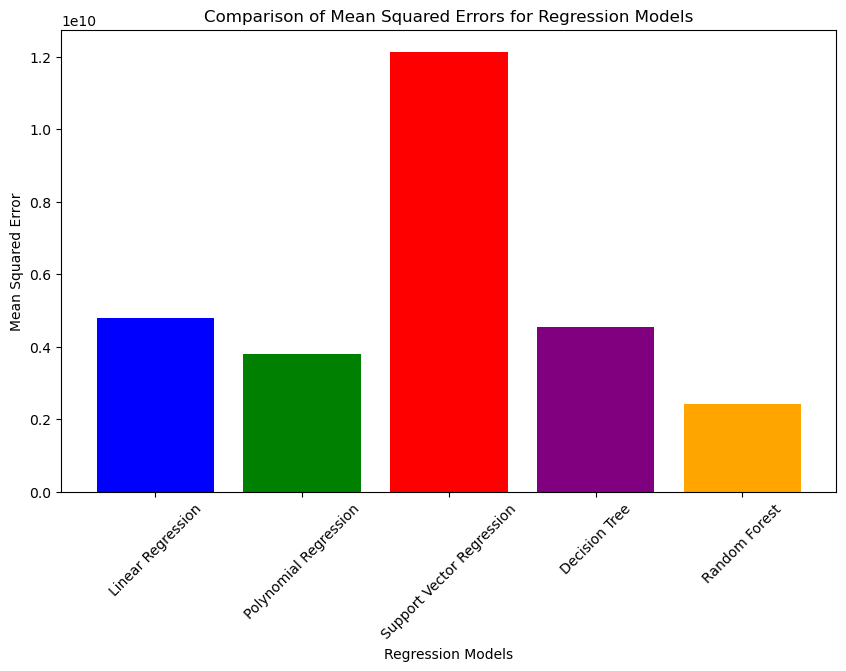

In [23]:
import matplotlib.pyplot as plt

# Mean Squared Errors for each model
mse_values = {
    'Linear Regression': linear_mse,
    'Polynomial Regression': poly_mse,
    'Support Vector Regression': svr_mse,
    'Decision Tree': dt_mse,
    'Random Forest': rf_mse
}

# Plotting the MSE values
plt.figure(figsize=(10, 6))
plt.bar(mse_values.keys(), mse_values.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Errors for Regression Models')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()


# Visulaizing prediction accuracies with matplotlib

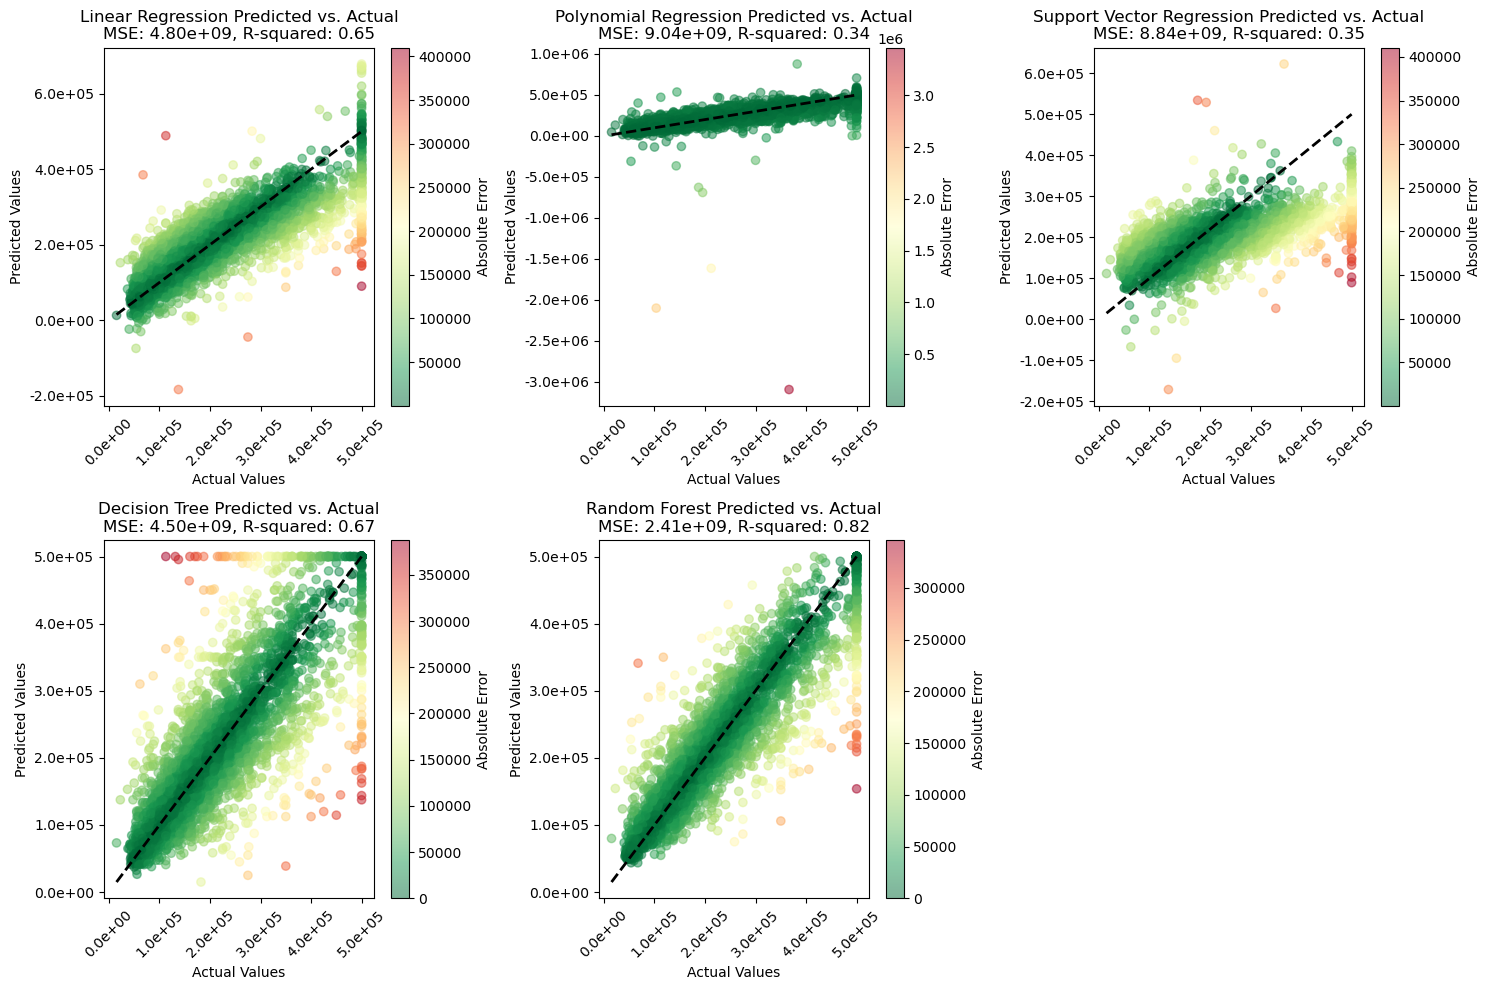

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format numbers in scientific notation
def scientific_notation(x, pos):
    return f'{x:.1e}'

# Predicted values for each model
predictions = {
    'Linear Regression': linear_predictions,
    'Polynomial Regression': poly_predictions,
    'Support Vector Regression': svr_predictions,
    'Decision Tree': dt_predictions,
    'Random Forest': rf_predictions,
}

# Calculate MSE and R-squared for each model
metrics = {
    'Linear Regression': (mean_squared_error(y_test, linear_predictions), r2_score(y_test, linear_predictions)),
    'Polynomial Regression': (mean_squared_error(y_test, poly_predictions), r2_score(y_test, poly_predictions)),
    'Support Vector Regression': (mean_squared_error(y_test, svr_predictions), r2_score(y_test, svr_predictions)),
    'Decision Tree': (mean_squared_error(y_test, dt_predictions), r2_score(y_test, dt_predictions)),
    'Random Forest': (mean_squared_error(y_test, rf_predictions), r2_score(y_test, rf_predictions)),
}

# Check lengths and plot only if lengths match
plt.figure(figsize=(15, 10))

for i, (model_name, preds) in enumerate(predictions.items(), 1):
    if len(y_test) != len(preds):
        print(f"Length mismatch for {model_name}: y_test has {len(y_test)} elements, but predictions have {len(preds)} elements.")
        continue

    plt.subplot(2, 3, i)
    errors = np.abs(y_test - preds)  # Calculate absolute errors
    scatter = plt.scatter(y_test, preds, c=errors, cmap='RdYlGn_r', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Predicted vs. Actual\nMSE: {metrics[model_name][0]:.2e}, R-squared: {metrics[model_name][1]:.2f}')
    plt.colorbar(scatter, label='Absolute Error')
    plt.gca().xaxis.set_major_formatter(FuncFormatter(scientific_notation))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(scientific_notation))
    plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


### The Random Forest has the highest number of accurate predictions and the least amount of large outliers.
### A simple degree 4 polynomial model with no tweaking has a poor MSE and R-squared value, with some predictions that are very off.


<font size=8>For classification we are using the target of ocean_proximity_NEAR BAY.</font>   
##  We need to redefine X and y and re-split the data

In [98]:
# Select features and target
X = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = data['ocean_proximity_NEAR BAY']  # Example for one class


## Now split and standardize

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# K Nearest Neigbors

In [101]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Train and evaluate K-Nearest Neighbors Classification
knn = KNeighborsClassifier(n_neighbors=9)  # You can experiment with different values of k

knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f'K-Nearest Neighbors Accuracy: {knn_accuracy}')


K-Nearest Neighbors Accuracy: 0.9486175678982138


# Logistic Regression

In [102]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train and evaluate Logistic Regression
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

log_reg_predictions = log_reg.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

print(f'Logistic Regression Accuracy: {log_reg_accuracy}')


Logistic Regression Accuracy: 0.9175434303890384


# SVM Kernal Model

In [94]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train and evaluate Kernel SVM
kernel_svm = SVC(kernel='rbf')  # You can experiment with different kernels like 'linear', 'poly', 'rbf'

kernel_svm.fit(X_train, y_train)

svm_predictions = kernel_svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f'Kernel SVM Accuracy: {svm_accuracy}')


Kernel SVM Accuracy: 0.9420112551994128


# Random forest classification

In [103]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train and evaluate Random Forest Classification
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_clf.fit(X_train, y_train)

rf_clf_predictions = random_forest_clf.predict(X_test)

rf_clf_accuracy = accuracy_score(y_test, rf_clf_predictions)

print(f'Random Forest Classification Accuracy: {rf_clf_accuracy}')

Random Forest Classification Accuracy: 0.9941277220455101


# Naïve Bayes

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train and evaluate Naïve Bayes Classification
naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

nb_predictions = naive_bayes.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_predictions)

print(f'Naïve Bayes Classification Accuracy: {nb_accuracy}')

Naïve Bayes Classification Accuracy: 0.9559579153413261


# Classification model accuracy 

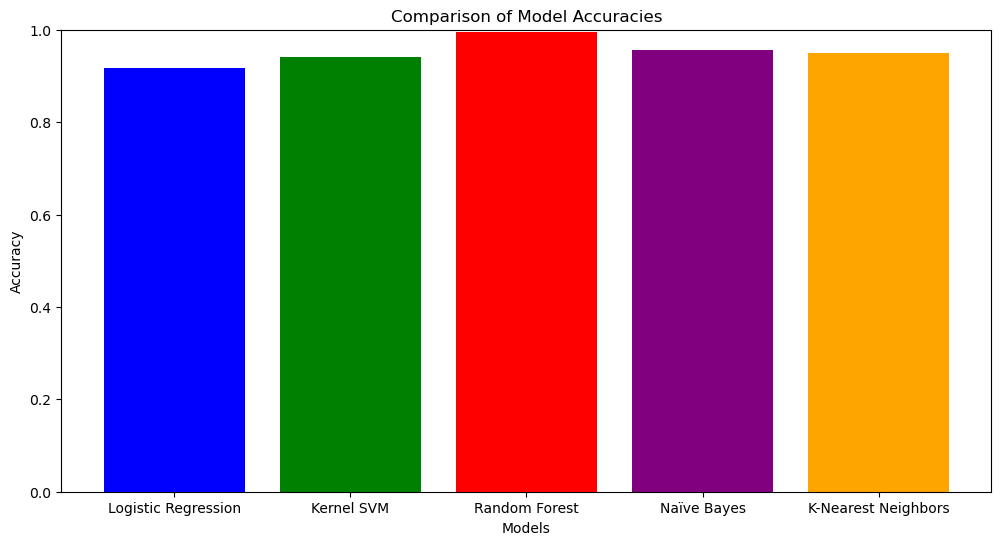

In [105]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Kernel SVM', 'Random Forest', 'Naïve Bayes', 'K-Nearest Neighbors']

# Model accuracies
accuracies = [log_reg_accuracy, svm_accuracy, rf_clf_accuracy, nb_accuracy, knn_accuracy]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()


# Here are the confusion matricies for each model. Once again Random Forest is the winner

K-Nearest Neighbors Accuracy: 0.9486175678982138


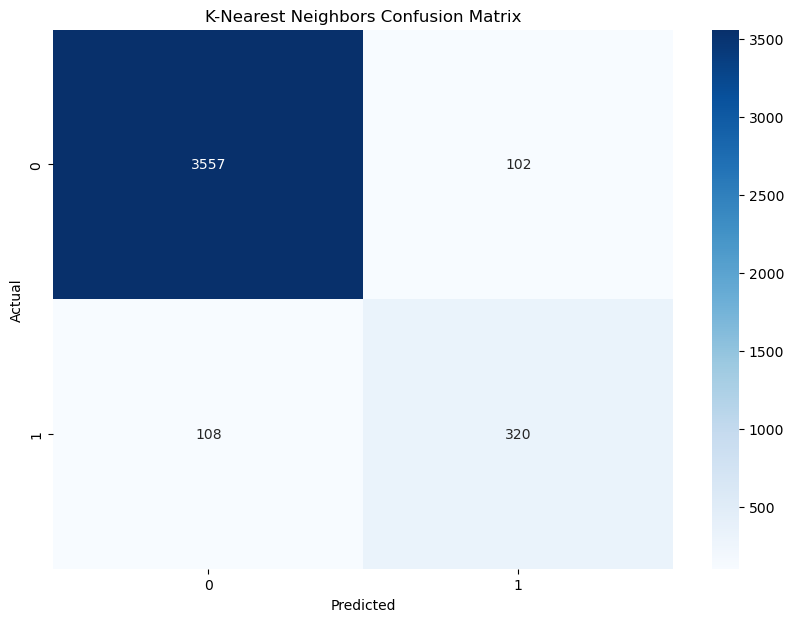

Logistic Regression Accuracy: 0.9175434303890384


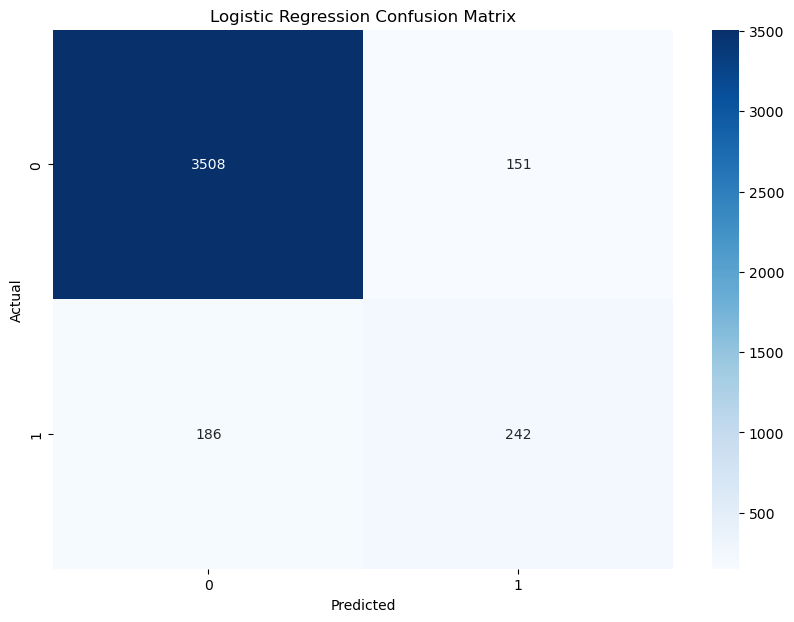

Kernel SVM Accuracy: 0.9420112551994128


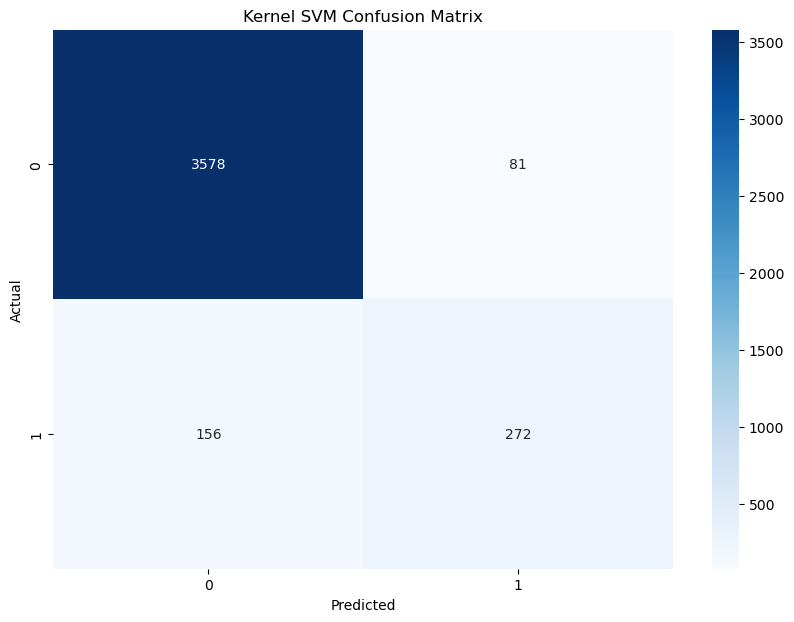

Random Forest Classification Accuracy: 0.9941277220455101


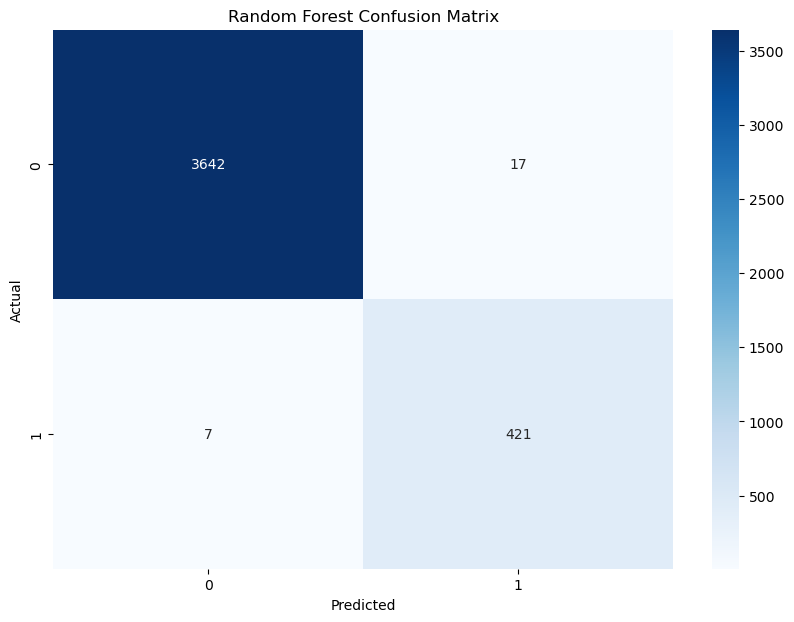

Naïve Bayes Classification Accuracy: 0.9559579153413261


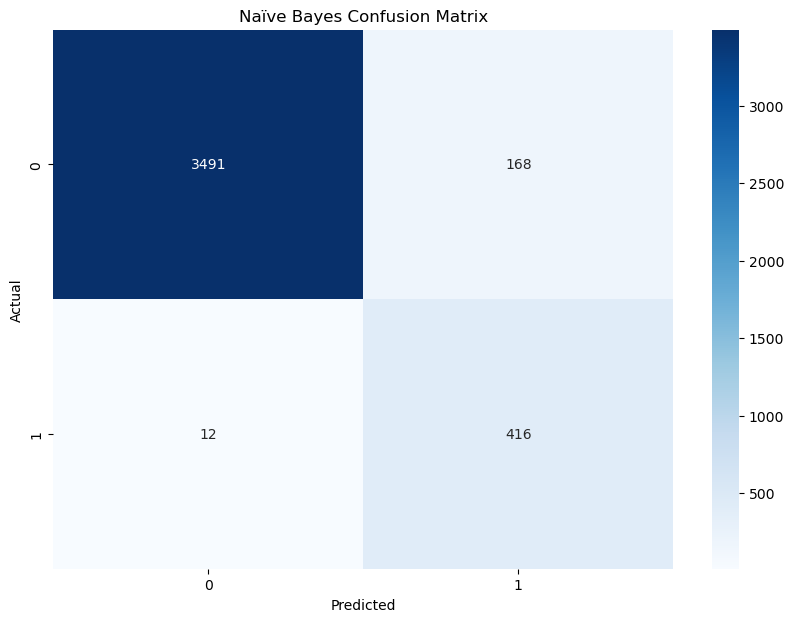

In [109]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, predictions, title):
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Evaluate K-Nearest Neighbors Classification
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy}')
plot_confusion_matrix(y_test, knn_predictions, 'K-Nearest Neighbors Confusion Matrix')

# Evaluate Logistic Regression
log_reg_predictions = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f'Logistic Regression Accuracy: {log_reg_accuracy}')
plot_confusion_matrix(y_test, log_reg_predictions, 'Logistic Regression Confusion Matrix')

# Evaluate Kernel SVM
svm_predictions = kernel_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'Kernel SVM Accuracy: {svm_accuracy}')
plot_confusion_matrix(y_test, svm_predictions, 'Kernel SVM Confusion Matrix')

# Evaluate Random Forest Classification
rf_clf_predictions = random_forest_clf.predict(X_test)
rf_clf_accuracy = accuracy_score(y_test, rf_clf_predictions)
print(f'Random Forest Classification Accuracy: {rf_clf_accuracy}')
plot_confusion_matrix(y_test, rf_clf_predictions, 'Random Forest Confusion Matrix')

# Evaluate Naïve Bayes Classification
nb_predictions = naive_bayes.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f'Naïve Bayes Classification Accuracy: {nb_accuracy}')
plot_confusion_matrix(y_test, nb_predictions, 'Naïve Bayes Confusion Matrix')

